In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math

## Insertion Sort

In [2]:
def insertion_sort(list): #in-place
    for i in range(1, len(list)): #第一個元素固定，從第二個開始
        tmp = list[i]
        j = i - 1 #固定元素的前一個數字
        while j >= 0 and tmp < list[j]:
            list[j + 1] = list[j] #值向右
            j = j - 1
        list[ j + 1 ] = tmp

In [3]:
t = 23
InsertionSort = list()

for k in range(10,t):
    M = list()
    for i in range(10):
        arr = list(np.arange(1,2**k+1))
        r = random.sample(arr,100)
        arr[arr.index(r[i])] = random.randint(1,1001) 
        starttime = time.clock()
        insertion_sort(arr)
        endtime = time.clock()
        M.append(endtime - starttime)
    InsertionSort.append(np.mean(M))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


### 估計時間
根據圖估計，執行時間隨數字越大呈倍數上升

In [4]:
t = len(InsertionSort)
for i in range(0,21):
    if(i>=t):
        InsertionSort.append(InsertionSort[i-2]/InsertionSort[i-3]*InsertionSort[i-1])

## Merge Sort

In [5]:
# Python program for implementation of MergeSort 
# Merges two subarrays of arr[]. 
# First subarray is arr[l..m] 
# Second subarray is arr[m+1..r] 
def merge(arr, l, m, r): 
    n1 = m - l + 1
    n2 = r- m 
    # create temp arrays 
    L = [0] * (n1) 
    R = [0] * (n2) 
    # Copy data to temp arrays L[] and R[] 
    for i in range(0 , n1): 
        L[i] = arr[l + i] 
    for j in range(0 , n2): 
        R[j] = arr[m + 1 + j] 
    # Merge the temp arrays back into arr[l..r] 
    i = 0     # Initial index of first subarray 
    j = 0     # Initial index of second subarray 
    k = l     # Initial index of merged subarray 
    while i < n1 and j < n2 : 
        if L[i] <= R[j]: 
            arr[k] = L[i] 
            i += 1
        else: 
            arr[k] = R[j] 
            j += 1
        k += 1
    # Copy the remaining elements of L[], if there 
    # are any 
    while i < n1: 
        arr[k] = L[i] 
        i += 1
        k += 1
    # Copy the remaining elements of R[], if there 
    # are any 
    while j < n2: 
        arr[k] = R[j] 
        j += 1
        k += 1
# l is for left index and r is right index of the 
# sub-array of arr to be sorted 
def mergeSort(arr,l,r): 
    if l < r: 
        # Same as (l+r)//2, but avoids overflow for 
        # large l and h 
        m = (l+(r-1))//2
        # Sort first and second halves 
        mergeSort(arr, l, m) 
        mergeSort(arr, m+1, r) 
        merge(arr, l, m, r)   


In [6]:
t = 19
MergeSort = list()

for k in range(10,t):
    M = list()
    
    for i in range(10):
        arr = list(np.arange(1,2**k+1))
        r = random.sample(arr,100)
        arr[arr.index(r[i])] = random.randint(1,1001) 
        starttime = time.clock()
        n = len(arr) 
        mergeSort(arr,0,n-1) 
        endtime = time.clock()
        M.append(endtime - starttime)
    MergeSort.append(np.mean(M))


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


### 估計時間
根據圖估計，執行時間隨數字越大呈倍數上升

In [7]:
t = len(MergeSort)
for i in range(0,21):
    if(i>=t):
        MergeSort.append(MergeSort[i-2]/MergeSort[i-3]*MergeSort[i-1])

## Randomized Quick Sort

In [8]:
'''
The function which implements randomised QuickSort, 
using Haore's partition scheme. 
arr :- array to be sorted. 
start :- starting index of the array. 
stop :- ending index of the array. 
'''
def quicksort(arr, start, stop): 
    if(start < stop):  
        # pivotindex is the index where 
        # the pivot lies in the array 
        pivotindex = partitionrand(arr, start, stop)   
        # At this stage the array is partially sorted  
        # around the pivot. separately sorting the  
        # left half of the array and the right half of the array. 
        quicksort(arr , start , pivotindex) 
        quicksort(arr, pivotindex + 1, stop) 
# This function generates random pivot, swaps the first 
# element with the pivot and calls the partition function. 
def partitionrand(arr , start, stop): 
# Generating a random number between  
    # the starting index of the array and  
    # the ending index of the array. 
    randpivot = random.randrange(start, stop) 
# Swapping the starting element of  
    # the array and the pivot 
    arr[start], arr[randpivot] = arr[randpivot], arr[start] 
    return partition(arr, start, stop) 
''' 
This function takes the first element as pivot,  
places the pivot element at the correct position  
in the sorted array. All the elements are re-arranged  
according to the pivot, the elements smaller than  
the pivot is places on the left and the elements 
greater than the pivot is placed to the right of pivot. 
'''
def partition(arr,start,stop): 
    pivot = start # pivot 
    i = start - 1
    j = stop + 1
    while True: 
        while True: 
            i = i + 1
            if arr[i] >= arr[pivot]: 
                break
        while True: 
            j = j - 1
            if arr[j] <= arr[pivot]: 
                break
        if i >= j: 
            return j 
        arr[i] , arr[j] = arr[j] , arr[i] 

In [9]:
t = 17
QuickSort = list()

for k in range(10,t):
    M = list()
    for i in range(10):
        arr = list(np.arange(1,2**k+1))
        r = random.sample(arr,100)
        for i in range(len(r)):
            arr[arr.index(r[i])] = random.randint(1,1001) 
        starttime = time.clock()
        quicksort(arr, 0, len(arr) - 1) 
        endtime = time.clock()
        M.append(endtime - starttime)
    QuickSort.append(np.mean(M))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


### 估計時間
根據圖估計，執行時間隨數字越大呈倍數上升

In [10]:
t = len(QuickSort)
for i in range(0,21):
    if(i>=t):
        QuickSort.append(QuickSort[i-2]/QuickSort[i-3]*QuickSort[i-1])

## Counting Sort

In [11]:
def counting_sort(arr, max_val):
    m = max_val + 1
    count = [0] * m                
    
    for a in arr:
    # count occurences
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            arr[i] = a
            i += 1
    return arr

In [12]:
t = 18
CountingSort = list()

for k in range(10,t):
    M = list()
    
    for i in range(10):
        arr = list(np.arange(1,2**k+1))
        r = random.sample(arr,100)
        arr[arr.index(r[i])] = random.randint(1,1001) 
        starttime = time.clock()
        counting_sort(arr,max(arr))
        endtime = time.clock()
        M.append(endtime - starttime)
    CountingSort.append(np.mean(M))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


### 估計時間
根據圖估計，執行時間隨數字越大呈倍數上升

In [13]:
t = len(CountingSort)
for i in range(0,21):
    if(i>=t):
        CountingSort.append(CountingSort[i-2]/CountingSort[i-3]*CountingSort[i-1])

## Shell Sort

In [14]:
def shellSort(array, n):
    # Rearrange elements at each n/2, n/4, n/8, ... intervals
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = array[i]
            j = i
            while j >= gap and array[j - gap] > temp:
                array[j] = array[j - gap]
                j -= gap

            array[j] = temp
        gap //= 2

In [15]:
t = 18
ShellSort = list()

for k in range(10,t):
    M = list()
    
    for i in range(10):
        arr = list(np.arange(1,2**k+1))
        r = random.sample(arr,100)
        arr[arr.index(r[i])] = random.randint(1,1001) 
        starttime = time.clock()
        n = len(arr)
        shellSort(arr, n)
        endtime = time.clock()
        M.append(endtime - starttime)
    ShellSort.append(np.mean(M))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


### 估計時間
根據圖估計，執行時間隨數字越大呈倍數上升

In [16]:
t = len(ShellSort)
for i in range(0,21):
    if(i>=t):
        ShellSort.append(ShellSort[i-2]/ShellSort[i-3]*ShellSort[i-1])

In [22]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

Text(0, 0.5, '時間')

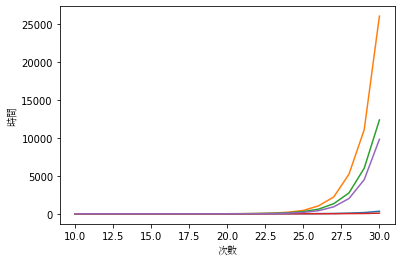

In [24]:
plt.plot(range(10,31),InsertionSort)
plt.plot(range(10,31),MergeSort)
plt.plot(range(10,31),QuickSort)
plt.plot(range(10,31),CountingSort)
plt.plot(range(10,31),ShellSort)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

Text(0, 0.5, '時間')

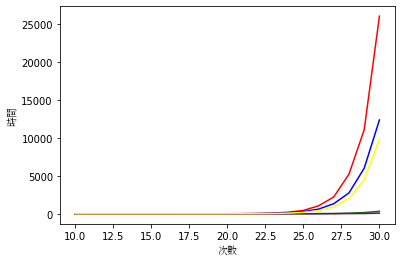

In [21]:
plt.plot(range(10,31),InsertionSort, color='green', label='Insertion Sort')
plt.plot(range(10,31),MergeSort, color='red', label='Merge Sort')
plt.plot(range(10,31),QuickSort, color='blue', label='Quick Sort')
plt.plot(range(10,31),CountingSort, color='purple', label='Counting Sort')
plt.plot(range(10,31),ShellSort, color='yellow', label='Shell Sort')
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

## 參考資料：
###### https://jialin128.pixnet.net/blog/post/141019829-%5B-%E8%B3%87%E6%96%99%E7%B5%90%E6%A7%8B-%5D-%E6%8F%92%E5%85%A5%E6%8E%92%E5%BA%8F%E6%B3%95%EF%BC%88insertion-sort%EF%BC%89in-pytho
###### https://www.geeksforgeeks.org/python-program-for-merge-sort/
###### https://www.geeksforgeeks.org/python-program-for-quicksort/
###### https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
###### https://www.itread01.com/content/1545908120.html
###### https://kopu.chat/2017/06/20/%E5%B8%8C%E7%88%BE%E6%8E%92%E5%BA%8F-shell-sort/
###### https://www.programiz.com/dsa/shell-sort